In [1]:
import torch

import numpy as np
import scipy.io as sio

import pandas as pd
import datetime as dt
import xarray as xr

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
root_dir = '/global/cfs/projectdirs/m1657/liuy351/TallTower/ContrastiveTransformer'


In [3]:
feature_path = '../runs/transformer_embedding.s.e10b128.2001-2020.pt'
time_idx_path = '../data/processed/preprocessed_data_time.2001-2020.csv'

In [4]:
# read features
feature = torch.load(feature_path).numpy()
feature.shape

(174592, 512)

In [5]:
time = pd.read_csv(time_idx_path, index_col=0).squeeze()
time = time[:feature.shape[0]]
time.shape

(174592,)

In [6]:
feature = xr.DataArray(feature, dims=['time', 'feature'], coords=[time, np.arange(feature.shape[1])])
feature

<xarray.DataArray (time: 174592, feature: 512)> Size: 358MB
array([[-10.488267  ,  -0.65948015,  -1.4182258 , ..., -18.64273   ,
        -47.782425  ,  15.544134  ],
       [ -9.264922  ,  -1.5946336 ,  -1.5872954 , ..., -20.671698  ,
        -47.79291   ,  13.891853  ],
       [-11.702016  ,   0.7145005 ,  -0.40343028, ..., -12.895958  ,
        -45.378967  ,  -6.3076253 ],
       ...,
       [-12.075145  ,   2.9417505 ,  -0.17230272, ...,   4.779974  ,
        -33.773586  ,  -1.1955547 ],
       [-11.799494  ,   2.9847944 ,   0.08885028, ...,   3.182082  ,
        -35.141266  ,  -0.94241804],
       [-11.705893  ,   2.9979491 ,   0.21868865, ...,   2.1689153 ,
        -35.985386  ,  -1.1532915 ]], dtype=float32)
Coordinates:
  * time     (time) object 1MB '2001-01-01 00:00:00' ... '2020-12-01 15:00:00'
  * feature  (feature) int64 4kB 0 1 2 3 4 5 6 7 ... 505 506 507 508 509 510 511

In [7]:
xfeature = feature.sel(time=slice('2016-01-01', '2017-01-01'))
xfeature

<xarray.DataArray (time: 8784, feature: 512)> Size: 18MB
array([[  4.360738  ,  -3.1429908 ,   1.38866   , ..., -27.746828  ,
        -39.774223  ,  38.617947  ],
       [  2.557261  ,  -2.3057199 ,   1.4025373 , ..., -25.247187  ,
        -40.89265   ,  37.930775  ],
       [ -0.70413935,   2.8178868 ,   4.502348  , ..., -14.574135  ,
        -40.50958   ,  18.245125  ],
       ...,
       [-21.173979  ,  11.945251  ,   3.2464018 , ...,  10.170069  ,
        -31.661747  ,  -8.794885  ],
       [-21.299843  ,   9.24893   ,   1.2526627 , ...,   9.026398  ,
        -33.48298   ,  -9.065014  ],
       [-21.850046  ,   6.8577986 ,  -0.75022393, ...,   9.4185915 ,
        -33.311638  , -12.41667   ]], dtype=float32)
Coordinates:
  * time     (time) object 70kB '2016-01-01 00:00:00' ... '2016-12-31 23:00:00'
  * feature  (feature) int64 4kB 0 1 2 3 4 5 6 7 ... 505 506 507 508 509 510 511

In [40]:
from sklearn.cluster import DBSCAN

eps = 55
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=1)
labels = dbscan.fit_predict(xfeature)

unique_labels = np.unique(labels)
print(f"Number of clusters found: {len(unique_labels) - (1 if -1 in labels else 0)}")
print(f"Number of noise points: {np.sum(labels == -1)}")

Number of clusters found: 11
Number of noise points: 33


In [42]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
from sklearn.cluster import OPTICS
min_samples = 5
clust = OPTICS(min_samples=min_samples, xi=0.01, min_cluster_size=0.05, n_jobs=1)
clust.fit(xfeature)
labels = clust.labels_

unique_labels = np.unique(labels)

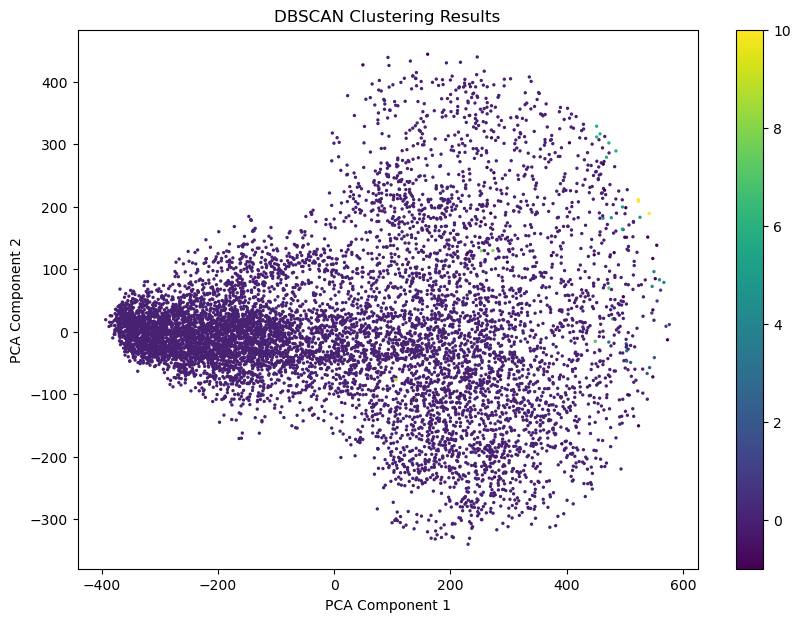

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(xfeature)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', s=2)
plt.title("DBSCAN Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

In [44]:
labels = xr.DataArray(labels, dims=['time'], coords=[xfeature.time])

In [47]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
labels.sel(time=slice('2016-06-27 00:00', '2016-06-30 00:00')).to_pandas()

time
2016-06-27 00:00:00    0
2016-06-27 01:00:00    0
2016-06-27 02:00:00    0
2016-06-27 03:00:00    0
2016-06-27 04:00:00    0
2016-06-27 05:00:00    0
2016-06-27 06:00:00    0
2016-06-27 07:00:00    0
2016-06-27 08:00:00    0
2016-06-27 09:00:00    0
2016-06-27 10:00:00    0
2016-06-27 11:00:00    0
2016-06-27 12:00:00    0
2016-06-27 13:00:00    0
2016-06-27 14:00:00    0
2016-06-27 15:00:00    0
2016-06-27 16:00:00    0
2016-06-27 17:00:00    0
2016-06-27 18:00:00    0
2016-06-27 19:00:00    0
2016-06-27 20:00:00    0
2016-06-27 21:00:00    0
2016-06-27 22:00:00    0
2016-06-27 23:00:00    0
2016-06-28 00:00:00    0
2016-06-28 01:00:00    0
2016-06-28 02:00:00    0
2016-06-28 03:00:00    0
2016-06-28 04:00:00    0
2016-06-28 05:00:00    0
2016-06-28 06:00:00    0
2016-06-28 07:00:00    0
2016-06-28 08:00:00    0
2016-06-28 09:00:00    0
2016-06-28 10:00:00    0
2016-06-28 11:00:00    0
2016-06-28 12:00:00    0
2016-06-28 13:00:00    0
2016-06-28 14:00:00    0
2016-06-28 15:00:00 

In [46]:
kmean_results = xr.Dataset({key: (["time"], value) for key, value in kmean_results.items()})
kmean_results.coords['time'] = xfeature.time
kmean_results.attrs['description'] = 'Classification using K-means'
kmean_results.attrs['script'] = '/global/cfs/projectdirs/m1657/liuy351/TallTower/SCL/04.clustering_kmean.ipynb'
kmean_results.to_netcdf(f'{root_dir}/runs/cluster.kmeanss.e10b128.2001-2020.ERA5.nc')
kmean_results

NameError: name 'kmean_results' is not defined

In [30]:
kmean_model.inertia_

53844480.0

In [29]:
ss = xr.DataArray(list(ss.values()), coords=[list(ss.keys())], dims=["cat"])
ss

<xarray.DataArray (cat: 18)> Size: 72B
array([0.5007049 , 0.4727762 , 0.38045964, 0.34022245, 0.35067028,
       0.32726085, 0.32232925, 0.32947132, 0.32801116, 0.30074924,
       0.30702403, 0.30585438, 0.30565712, 0.29133463, 0.29509917,
       0.29593277, 0.26764473, 0.27014247], dtype=float32)
Coordinates:
  * cat      (cat) <U3 216B 'C2' 'C3' 'C4' 'C5' 'C6' ... 'C16' 'C17' 'C18' 'C19'

In [31]:
wcss = xr.DataArray(list(wcss.values()), coords=[list(wcss.keys())], dims=["cat"])
wcss

<xarray.DataArray (cat: 18)> Size: 144B
array([2.97090144e+08, 2.22324480e+08, 1.68702224e+08, 1.43234256e+08,
       1.19858328e+08, 1.07952952e+08, 9.91233600e+07, 9.12735440e+07,
       8.42490240e+07, 7.83148800e+07, 7.36617440e+07, 6.91685520e+07,
       6.57368240e+07, 6.28690640e+07, 5.99334040e+07, 5.77926440e+07,
       5.58076120e+07, 5.38444800e+07])
Coordinates:
  * cat      (cat) <U3 216B 'C2' 'C3' 'C4' 'C5' 'C6' ... 'C16' 'C17' 'C18' 'C19'

In [32]:
# Calculate the differences and second derivatives of the WCSS
diff_wcss = np.diff(wcss[2:])
diff2_wcss = np.diff(diff_wcss[2:])

# Find the elbow point
elbow_point = np.argmax(diff2_wcss) + 2 
elbow_point

2

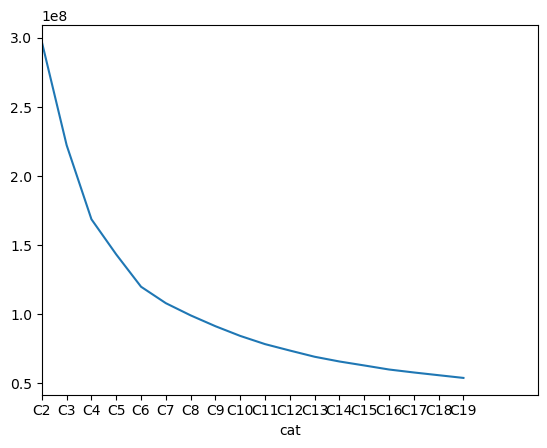

In [33]:
wcss.plot(xlim=(0,20))